<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Support%20Vector%20Machines/support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


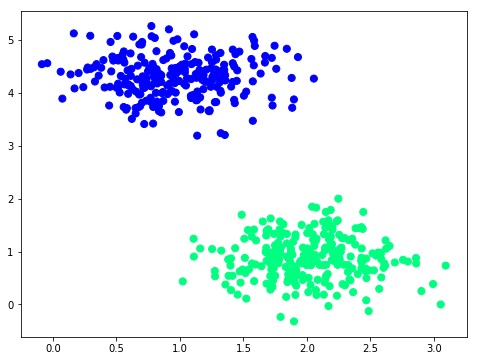

In [6]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 


# plotting scatters  
plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter'); 
plt.show()  

In [16]:
from sklearn.svm import SVC # "Support vector classifier"
svc = SVC(kernel='linear', C=1E10)
svc.fit(X, y)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

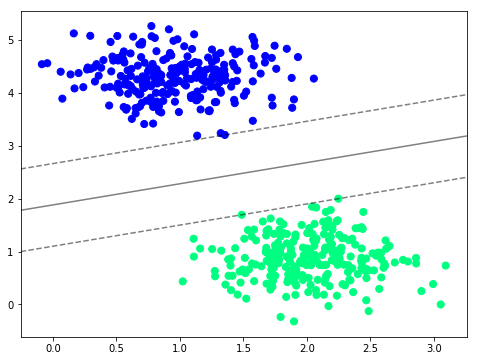

In [18]:
plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(svc);

In [19]:
model.support_vectors_

array([[1.35348851, 3.20791646],
       [1.48649957, 1.69684609],
       [2.24771357, 2.00140571]])